# Hope-to-Skill Free AI Course
Loading dataset\
Preprocessing the dataset\
Definition of Neural Network\
Training a Neural Network\
Testing a Neural Network



## **Loading Required packages and Data**

Here we will try to maximize the accuray of our ANN on the cifer dataset as much as we can using different techniques

In [1]:
# Importing necessay libraries for the project
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

## **Data Splitting**




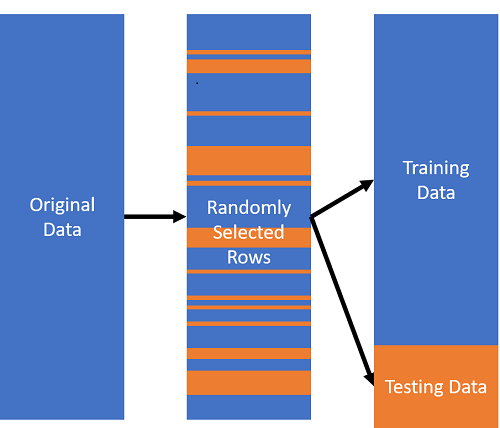

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

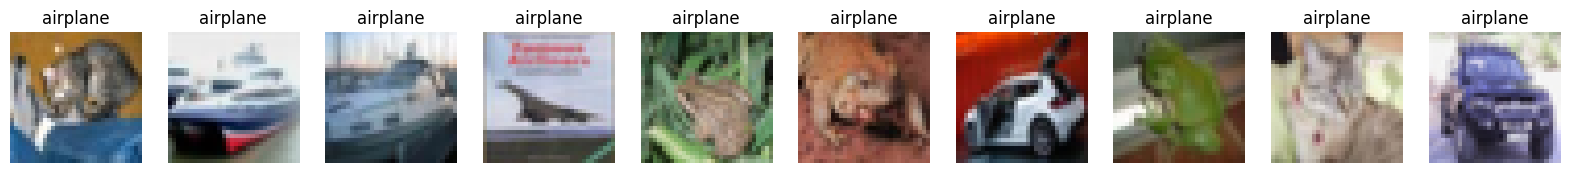

In [4]:
# Number of images to display
n = 10

# Creating a figure to display the images
plt.figure(figsize=(20, 4))

# Looping through the first 'n' images
for i in range(n):
    # Creating a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Displaying the original image
    plt.imshow(x_test[i].reshape(32,32,3))
    plt.title(class_names[np.argmax(y_test[i])])
    plt.axis('off')

    # Setting colormap to grayscale
    plt.gray()

    # Hiding x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Showing the figure with the images
plt.show()

# Closing the figure
plt.close()

## **Data Augmentation**

In [5]:
# Making a flip copy of the data to make augmented data
x_train_flipped = np.array([np.fliplr(image) for image in x_train])
x_test_flipped = np.array([np.fliplr(image) for image in x_test])

# Making 20 degree rotated copy of the data

# Adding the augmented data to the actual data
x_train = np.concatenate((x_train, x_train_flipped), axis=0)
x_test = np.concatenate((x_test, x_test_flipped), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)
y_test = np.concatenate((y_test, y_test), axis=0)

## **Normalization**

In [6]:
y_train = to_categorical(y_train, num_classes = len(class_names))
y_test = to_categorical(y_test, num_classes = len(class_names))
# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((100000, 32, 32, 3), (20000, 32, 32, 3), (100000, 10), (20000, 10))

## **Class Names**

## **Model Definition**

In [21]:
# Define the input size for each data sample (e.g., image pixels)
input_size = x_train.shape[1:4]

# Specify the number of data samples to process in each batch
batch_size = 64

# Define the number of neurons in the first hidden layer
hidden1 = 1500

# Define the number of neurons in the second hidden layer
hidden2 = 750

# Define the number of neurons in the third hidden layer
hidden3 = 300

# Define the number of neurons in the fourth hidden layer
hidden4 = 100

# Define the number of neurons in the fifth hidden layer
hidden5 = 30

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 200

In [22]:
### 4. Build the model ###

# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

model.add(layers.Flatten(input_shape=input_size))

model.add(Dense(hidden1, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(Dense(hidden2, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(Dense(hidden3, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(Dense(hidden4, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(Dense(hidden5, activation='relu'))

model.add(Dense(classes, activation='softmax'))


# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001))

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 1500)              4609500   
                                                                 
 batch_normalization_6 (Bat  (None, 1500)              6000      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 1500)              0         
                                                                 
 dense_11 (Dense)            (None, 750)               1125750   
                                                                 
 batch_normalization_7 (Bat  (None, 750)               3000      
 chNormalization)                                     

## **Model Compilation**

## **Model Training**

In [23]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # metric to monitor
    patience=10,  # number of epochs to wait for improvement
    restore_best_weights=True  # restore the best weights
)

In [24]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/200
1250/1250 [==============================] - 15s 8ms/step - loss: 1.9631 - accuracy: 0.3117 - val_loss: 1.7186 - val_accuracy: 0.4002
Epoch 2/200
1250/1250 [==============================] - 12s 9ms/step - loss: 1.7111 - accuracy: 0.3920 - val_loss: 1.6406 - val_accuracy: 0.4177
Epoch 3/200
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6304 - accuracy: 0.4201 - val_loss: 1.5840 - val_accuracy: 0.4397
Epoch 4/200
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5786 - accuracy: 0.4394 - val_loss: 1.5405 - val_accuracy: 0.4533
Epoch 5/200
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5446 - accuracy: 0.4493 - val_loss: 1.5346 - val_accuracy: 0.4574
Epoch 6/200
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5190 - accuracy: 0.4595 - val_loss: 1.5407 - val_accuracy: 0.4489
Epoch 7/200
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4892 - accuracy: 0.4701 - val_loss: 1.4547 - 

## **Model Evaluation**

In [25]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

625/625 - 2s - loss: 1.1893 - accuracy: 0.5889 - 2s/epoch - 3ms/step

Test accuracy: 0.5888500213623047


## **Data Visualization**

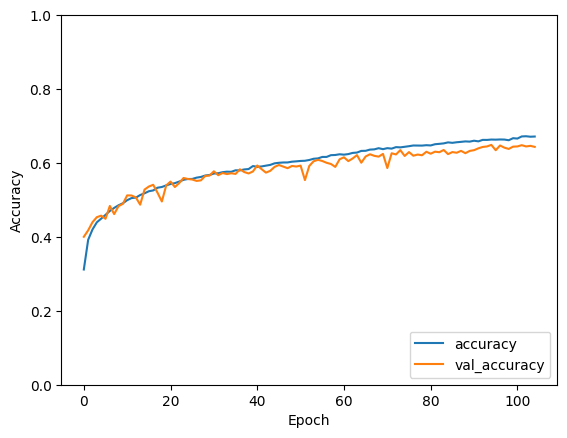

In [26]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

625/625 [==============================] - 2s 3ms/step


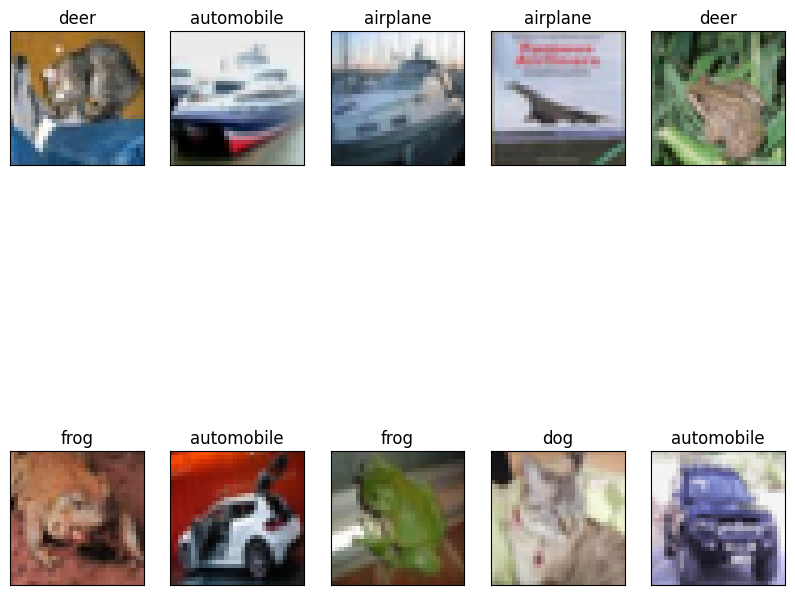

In [50]:
# prompt: plotted the prediction with the images

import matplotlib.pyplot as plt
import numpy as np
# Make predictions on the test data
predictions = model.predict(x_test)

# Get the index of the predicted class for each test sample
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual class labels for the test data
true_classes = np.argmax(y_test, axis=1)

# Create a figure to display the images and predictions
plt.figure(figsize=(10, 10))

# Loop through the first 10 test samples
for i in range(10):
    # Create a subplot within the figure
    ax = plt.subplot(2, 5, i + 1)

    # Display the test image
    plt.imshow(x_test[i].reshape(32, 32, 3))

    # Set the title to the predicted class
    plt.title(class_names[predicted_classes[i]])

    # Set the colormap to grayscale
    plt.gray()

    # Hide the x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure
plt.show()
